In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf

# import plotnine as p9

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# --

In [2]:
"""
Ticker  Fund Name                           Issuer                          AUM         Expense Ratio       3-Mo TR     Segment
MSTU	T-Rex 2X Long MSTR Daily Target ETF	Tuttle Capital Management LLC	$850.96M	1.05%	            -68.3%	    Leveraged Equity: U.S. Application Software
""";

In [3]:
# tickers = ['MSTU', 'MSTR']
# ydata = yf.Tickers(tickers).download(period="max", auto_adjust=True, interval="1h")['Close']

In [4]:
# ydata.head()

In [5]:
# data = (   # put data in long form
#     ydata
#     .dropna()
#     .stack(future_stack=True)  # Removed the level parameter since there's only one level
#     .reset_index()
#     .rename(columns={0: 'Close'})  # Rename the stacked column to 'Close'
#     [['Datetime', 'Ticker', 'Close']]  # Note: column is 'Datetime', not 'Date', because of interval="1h"
#     .sort_values(by=['Datetime', 'Ticker'])
# )

# data.head(5)

In [6]:
# # time period is the min datetime of data df, converted to string in format YYYY-MM-DD
# time_period = data['Datetime'].min()

# # keep only date from time_period
# time_period = time_period.date().strftime('%Y-%m-%d')

# print(time_period)

In [7]:
# # download historical data from Yahoo Finance to csv, file name data_<tickers>_2002-07-30_D.csv
# data.to_csv('data_MSTU_MSTR_' + time_period + '_D.csv', index=False)

In [8]:
time_period = "2024-09-18"

In [9]:
# read data from csv
data = pd.read_csv('data_MSTU_MSTR_' + time_period + '_D.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])
print(data.info())
print(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994 entries, 0 to 3993
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  3994 non-null   datetime64[ns, UTC]
 1   Ticker    3994 non-null   object             
 2   Close     3994 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 93.7+ KB
None
                   Datetime Ticker       Close
0 2024-09-18 13:30:00+00:00   MSTR  130.410004
1 2024-09-18 13:30:00+00:00   MSTU    2.415000
2 2024-09-18 14:30:00+00:00   MSTR  131.684998
3 2024-09-18 14:30:00+00:00   MSTU    2.496000
4 2024-09-18 15:30:00+00:00   MSTR  132.600006


In [10]:
# rename Datetime to Date, to keep consistent with previous notebooks
data = data.rename(columns={'Datetime': 'Date'})

In [11]:
# Add year-month label (end of month date)

# Convert Date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'ym' representing the last day of each month
data['ym'] = data['Date'] + pd.offsets.MonthEnd(0)

# keep only date for column ym
data['ym'] = data['ym'].dt.date

data.head()

,Date,Ticker,Close,ym
0,2024-09-18 13:30:00+00:00,MSTR,130.410004,2024-09-30
1,2024-09-18 13:30:00+00:00,MSTU,2.415000,2024-09-30
2,2024-09-18 14:30:00+00:00,MSTR,131.684998,2024-09-30
3,2024-09-18 14:30:00+00:00,MSTU,2.496000,2024-09-30
4,2024-09-18 15:30:00+00:00,MSTR,132.600006,2024-09-30


In [12]:
"""
df starts from 2024-09-18

In the next cell, this will be marked as td = 1, but actually it td = 12.

Due to this, in the next cell, I introduced a filter to keep data from a full month, 2024-10-01 onwards.
""";

In [13]:
# # # Original code:

# # Create trading-day counter for each Ticker and month

# # Sort data to ensure correct order
# data = data.sort_values(['Ticker', 'Date']).copy()

# # Keep data from October 2024 onwards - make timestamp timezone-aware
# data = data[data['Date'] >= pd.Timestamp(2024, 10, 1, tz='UTC')]

# # Count trading days within each (Ticker, ym) group
# data['td'] = data.groupby(['Ticker', 'ym']).cumcount() + 1

# # # add data['td'] column where td is the day of the month for each Ticker
# # data['td'] = data['Date'].dt.day

# data.head()

In [14]:
# Revised code:

# Create trading-day counter for each Ticker and month

# Sort data to ensure correct order
data = data.sort_values(['Ticker', 'Date']).copy()

# # Keep data from October 2024 onwards - make timestamp timezone-aware
# data = data[data['Date'] >= pd.Timestamp(2024, 10, 1, tz='UTC')]

# # Count trading days within each (Ticker, ym) group
# data['td'] = data.groupby(['Ticker', 'ym']).cumcount() + 1

# add data['td'] column where td is the day of the month for each Ticker
data['td'] = data['Date'].dt.day

data.head()

,Date,Ticker,Close,ym,td
0,2024-09-18 13:30:00+00:00,MSTR,130.410004,2024-09-30,18
2,2024-09-18 14:30:00+00:00,MSTR,131.684998,2024-09-30,18
4,2024-09-18 15:30:00+00:00,MSTR,132.600006,2024-09-30,18
6,2024-09-18 16:30:00+00:00,MSTR,133.732498,2024-09-30,18
8,2024-09-18 17:30:00+00:00,MSTR,137.080002,2024-09-30,18


In [15]:
#  Calculate daily simple returns

# Calculate percentage change of 'Close' within each ticker
data['ret'] = data.groupby('Ticker')['Close'].pct_change()

# fill na values in ret with 0
data['ret'] = data['ret'].fillna(0)

data.head()

,Date,Ticker,Close,ym,td,ret
0,2024-09-18 13:30:00+00:00,MSTR,130.410004,2024-09-30,18,0.000000
2,2024-09-18 14:30:00+00:00,MSTR,131.684998,2024-09-30,18,0.009777
4,2024-09-18 15:30:00+00:00,MSTR,132.600006,2024-09-30,18,0.006948
6,2024-09-18 16:30:00+00:00,MSTR,133.732498,2024-09-30,18,0.008541
8,2024-09-18 17:30:00+00:00,MSTR,137.080002,2024-09-30,18,0.025031


In [16]:
# Filter dates and keep only needed columns

# Keep only useful columns
data = data[['Date', 'ym', 'Ticker', 'Close', 'ret', 'td']]

data.head()

,Date,ym,Ticker,Close,ret,td
0,2024-09-18 13:30:00+00:00,2024-09-30,MSTR,130.410004,0.000000,18
2,2024-09-18 14:30:00+00:00,2024-09-30,MSTR,131.684998,0.009777,18
4,2024-09-18 15:30:00+00:00,2024-09-30,MSTR,132.600006,0.006948,18
6,2024-09-18 16:30:00+00:00,2024-09-30,MSTR,133.732498,0.008541,18
8,2024-09-18 17:30:00+00:00,2024-09-30,MSTR,137.080002,0.025031,18


In [17]:
# Create start/end/month flags and conditional returns

# # Original code:
# N = 15  # number of days for start of month
# M = 5   # number of days for next start of month

# Revised code:
N = 20  # number of days for start of month (calendar days)
M = 7   # number of days for next start of month (calendar days)

# Flags: 1 if condition true, 0 otherwise
data['som_flag'] = (data['td'] <= N).astype(int)
data['eom_flag'] = (data['td'] > N).astype(int)
data['nsm_flag'] = (data['td'] <= M).astype(int)

# Conditional returns (return only within flag period)
data['ret_som'] = data['ret'] * data['som_flag']
data['ret_eom'] = data['ret'] * data['eom_flag']
data['ret_nsm'] = data['ret'] * data['nsm_flag']

data_ = data.copy()

data.head()

,Date,ym,Ticker,Close,ret,td,som_flag,eom_flag,nsm_flag,ret_som,ret_eom,ret_nsm
0,2024-09-18 13:30:00+00:00,2024-09-30,MSTR,130.410004,0.000000,18,1,0,0,0.000000,0.0,0.0
2,2024-09-18 14:30:00+00:00,2024-09-30,MSTR,131.684998,0.009777,18,1,0,0,0.009777,0.0,0.0
4,2024-09-18 15:30:00+00:00,2024-09-30,MSTR,132.600006,0.006948,18,1,0,0,0.006948,0.0,0.0
6,2024-09-18 16:30:00+00:00,2024-09-30,MSTR,133.732498,0.008541,18,1,0,0,0.008541,0.0,0.0
8,2024-09-18 17:30:00+00:00,2024-09-30,MSTR,137.080002,0.025031,18,1,0,0,0.025031,0.0,0.0


In [18]:
# Keep only relevant return columns
data_flags = data[['Date', 'ym', 'Ticker', 'ret_som', 'ret_eom', 'ret_nsm']]

data_flags.head()

,Date,ym,Ticker,ret_som,ret_eom,ret_nsm
0,2024-09-18 13:30:00+00:00,2024-09-30,MSTR,0.000000,0.0,0.0
2,2024-09-18 14:30:00+00:00,2024-09-30,MSTR,0.009777,0.0,0.0
4,2024-09-18 15:30:00+00:00,2024-09-30,MSTR,0.006948,0.0,0.0
6,2024-09-18 16:30:00+00:00,2024-09-30,MSTR,0.008541,0.0,0.0
8,2024-09-18 17:30:00+00:00,2024-09-30,MSTR,0.025031,0.0,0.0


In [19]:
# Pivot to wide format (one column per Ticker)

# Create wide format table: columns for each Ticker and return type
pivoted = data_flags.pivot(index=['Date', 'ym'], columns='Ticker')

# Flatten multi-level column names (e.g. ret_som_MSTU)
pivoted.columns = [f"{col[1]}_{col[0]}" for col in pivoted.columns]

pivoted = pivoted.reset_index()

# count of nan values in each column
nan = pivoted.isna().sum()
print(nan)

# fill missing values with 0
pivoted = pivoted.fillna(0)

pivoted.head()

Date            0
ym              0
MSTR_ret_som    0
MSTU_ret_som    0
MSTR_ret_eom    0
MSTU_ret_eom    0
MSTR_ret_nsm    0
MSTU_ret_nsm    0
dtype: int64


,Date,ym,MSTR_ret_som,MSTU_ret_som,MSTR_ret_eom,MSTU_ret_eom,MSTR_ret_nsm,MSTU_ret_nsm
0,2024-09-18 13:30:00+00:00,2024-09-30,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2024-09-18 14:30:00+00:00,2024-09-30,0.009777,0.033540,0.0,0.0,0.0,0.0
2,2024-09-18 15:30:00+00:00,2024-09-30,0.006948,0.017224,0.0,0.0,0.0,0.0
3,2024-09-18 16:30:00+00:00,2024-09-30,0.008541,0.016546,0.0,0.0,0.0,0.0
4,2024-09-18 17:30:00+00:00,2024-09-30,0.025031,0.046106,0.0,0.0,0.0,0.0


In [20]:
# create a copy of data to be later used for the backtest analysis (8 PL streams in the backtesting)
backtest_data = pivoted.copy()

In [21]:
# Compute relative returns and aggregate monthly

# Calculate combined and relative returns
pivoted['MSTU_ret'] = pivoted['MSTU_ret_som'] + pivoted['MSTU_ret_eom']
pivoted['MSTU_MSTR_som'] = pivoted['MSTU_ret_som'] - pivoted['MSTR_ret_som']
pivoted['MSTU_MSTR_eom'] = pivoted['MSTU_ret_eom'] - pivoted['MSTR_ret_eom']
pivoted['MSTU_MSTR_nsm'] = pivoted['MSTU_ret_nsm'] - pivoted['MSTR_ret_nsm']

# Add MSTR returns to pivoted
pivoted['MSTR_ret'] = pivoted['MSTR_ret_som'] + pivoted['MSTR_ret_eom']

# Select relevant columns
returns = pivoted[['ym', 'MSTU_ret', 'MSTR_ret', 'MSTU_MSTR_som', 'MSTU_MSTR_eom', 'MSTU_MSTR_nsm']]

# Aggregate monthly returns using compounding formula
monthly = returns.groupby('ym').apply(lambda x: (1 + x).prod() - 1)

monthly.head()

,MSTU_ret,MSTR_ret,MSTU_MSTR_som,MSTU_MSTR_eom,MSTU_MSTR_nsm
ym,,,,,
2024-09-30,0.656729,0.292539,0.134033,0.156672,0.000000
2024-10-31,0.917271,0.450047,0.256957,0.113612,0.105923
2024-11-30,1.065832,0.579167,0.840587,-0.199316,0.096027
2024-12-31,-0.522307,-0.249132,-0.130178,-0.218278,-0.016559
2025-01-31,0.211361,0.153026,0.331633,-0.162598,0.149117


In [22]:
monthly.tail(5)

,MSTU_ret,MSTR_ret,MSTU_MSTR_som,MSTU_MSTR_eom,MSTU_MSTR_nsm
ym,,,,,
2025-07-31,-0.059908,-0.006136,0.018396,-0.055574,-0.033192
2025-08-31,-0.355392,-0.168604,-0.170938,-0.044023,-0.018105
2025-09-30,-0.115304,-0.035332,0.014468,-0.079002,-0.000173
2025-10-31,-0.352101,-0.162487,-0.101131,-0.112280,0.022100
2025-11-30,-0.211111,-0.103287,-0.113059,0.000000,-0.113059


In [23]:
return_data = monthly.copy()

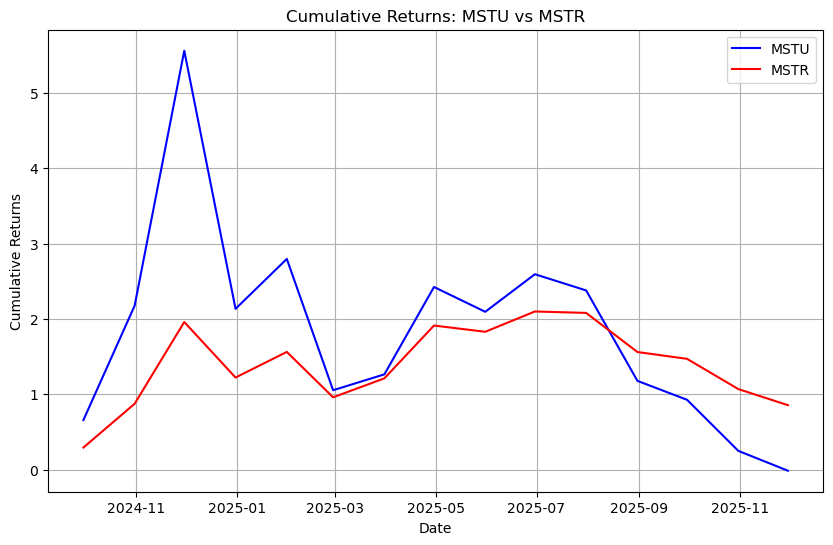

In [24]:
# calculate cumulative returns for MSTU_ret and MSTR_ret
monthly['MSTU_cumret'] = (1 + monthly['MSTU_ret']).cumprod() - 1
monthly['MSTR_cumret'] = (1 + monthly['MSTR_ret']).cumprod() - 1

# plot MSTU_ret vs MSTR_ret to compare their performance
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['MSTU_cumret'], label='MSTU', color='blue')
plt.plot(monthly.index, monthly['MSTR_cumret'], label='MSTR', color='red')
plt.title('Cumulative Returns: MSTU vs MSTR')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

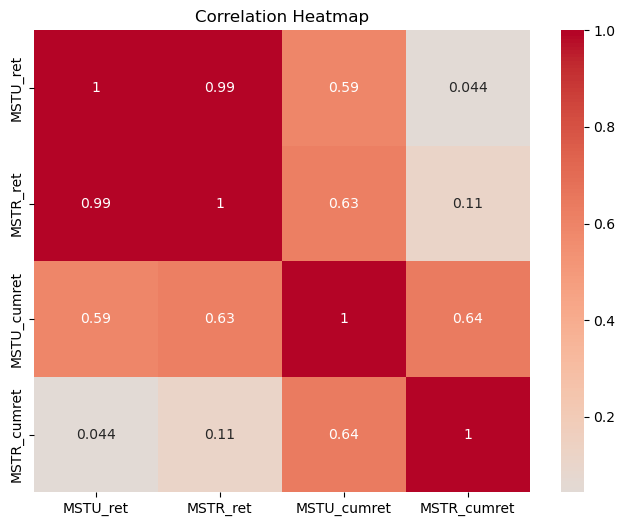

In [25]:
# plot correlation heatmap of MSTU_ret, MSTR_ret, MSTU_cumret, MSTR_cumret
plt.figure(figsize=(8, 6))
sns.heatmap(monthly[['MSTU_ret', 'MSTR_ret', 'MSTU_cumret', 'MSTR_cumret']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

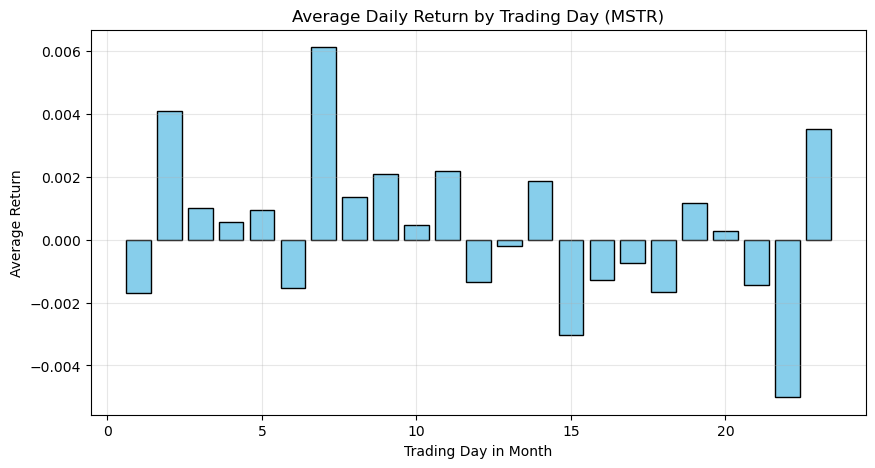

,td,ret
18,19,0.001177
19,20,0.000263
20,21,-0.001443
21,22,-0.005011
22,23,0.003524


In [26]:
# Average daily returns of MSTR and MSTU
# Keep only rows where the ticker is 'MSTR' 
MSTR = data[data['Ticker'] == 'MSTR'].copy()

# Add 'ym' column as the end of the month for each date 
MSTR['ym'] = MSTR['Date'] + pd.offsets.MonthEnd(0)

# Calculate daily return based on the Close price 
MSTR['ret'] = MSTR['Close'].pct_change()

MSTR_filtered = MSTR.copy()

# For each month, number the days starting from 1 
MSTR_filtered['td'] = MSTR_filtered.groupby('ym').cumcount() + 1

# Group by the trading day number and take the mean of returns 
avg_daily_returns = MSTR_filtered.groupby('td')['ret'].mean().reset_index()

# Plot average daily returns using matplotlib 
plt.figure(figsize=(10, 5))
plt.bar(avg_daily_returns['td'], avg_daily_returns['ret'], color='skyblue', edgecolor='black')

# Add labels and title 
plt.title("Average Daily Return by Trading Day (MSTR)")
plt.xlabel("Trading Day in Month")
plt.ylabel("Average Return")
plt.grid(alpha=0.3)

plt.show()

# Show the last few rows of the data for reference 
avg_daily_returns.tail()

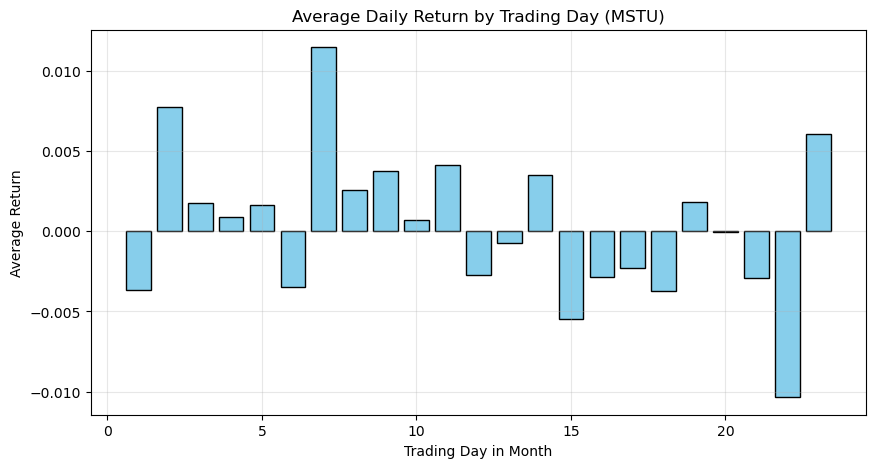

,td,ret
18,19,0.001861
19,20,-0.000022
20,21,-0.002909
21,22,-0.010349
22,23,0.006068


In [27]:
# Keep only rows where the ticker is 'MSTU'
MSTU = data[data['Ticker'] == 'MSTU'].copy()

# Add 'ym' column as the end of the month for each date
MSTU['ym'] = MSTU['Date'] + pd.offsets.MonthEnd(0)

# Calculate daily return based on the Close price
MSTU['ret'] = MSTU['Close'].pct_change()

# # Keep only data after ...
# MSTU_filtered = MSTU[MSTU['Date'] >= pd.Timestamp(2024, 10, 1, tz='UTC')].copy()

MSTU_filtered = MSTU.copy()

# For each month, number the days starting from 1
MSTU_filtered['td'] = MSTU_filtered.groupby('ym').cumcount() + 1

# Group by the trading day number and take the mean of returns
avg_daily_returns_MSTU = MSTU_filtered.groupby('td')['ret'].mean().reset_index()

# Plot average daily returns using matplotlib
plt.figure(figsize=(10, 5))
plt.bar(avg_daily_returns_MSTU['td'], avg_daily_returns_MSTU['ret'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Average Daily Return by Trading Day (MSTU)")
plt.xlabel("Trading Day in Month")
plt.ylabel("Average Return")
plt.grid(alpha=0.3)

plt.show()

# Show the last few rows of the data for reference
avg_daily_returns_MSTU.tail()

In [28]:
# drop ret	td	som_flag	eom_flag	nsm_flag	ret_som	ret_eom	ret_nsm from data_
data_ = data_.drop(columns=['ret', 'td', 'som_flag', 'eom_flag', 'nsm_flag', 'ret_som', 'ret_eom', 'ret_nsm'])

# pivot data_.Ticker
pivoted_data_ = data_.pivot(index='Date', columns='Ticker', values='Close')

In [29]:
# split DatetimeIndex index into Date and Time columns
pivoted_data_ = pivoted_data_.reset_index()

# Store the original datetime before converting
original_datetime = pivoted_data_['Date']

# Extract date and time from the original datetime column
pivoted_data_['Date'] = original_datetime.dt.date
pivoted_data_['Time'] = original_datetime.dt.time

# add pct_change columns for each Ticker
pivoted_data_['MSTU_pct_change'] = pivoted_data_['MSTU'].pct_change()
pivoted_data_['MSTR_pct_change'] = pivoted_data_['MSTR'].pct_change()

# fill na values with 0
pivoted_data_['MSTU_pct_change'] = pivoted_data_['MSTU_pct_change'].fillna(0)
pivoted_data_['MSTR_pct_change'] = pivoted_data_['MSTR_pct_change'].fillna(0)

pivoted_data_.head()

Ticker,Date,MSTR,MSTU,Time,MSTU_pct_change,MSTR_pct_change
0,2024-09-18,130.410004,2.41500,13:30:00,0.000000,0.000000
1,2024-09-18,131.684998,2.49600,14:30:00,0.033540,0.009777
2,2024-09-18,132.600006,2.53899,15:30:00,0.017224,0.006948
3,2024-09-18,133.732498,2.58100,16:30:00,0.016546,0.008541
4,2024-09-18,137.080002,2.70000,17:30:00,0.046106,0.025031


In [30]:
# Group by the hour and take the mean of returns 
avg_daily_returns = pivoted_data_.groupby('Time')[['MSTU_pct_change', 'MSTR_pct_change']].mean().reset_index()

avg_daily_returns.head(10)

Ticker,Time,MSTU_pct_change,MSTR_pct_change
0,13:30:00,0.003756,0.002521
1,14:30:00,0.005086,0.002976
2,15:30:00,-0.000594,-0.000377
3,16:30:00,-0.000034,0.000067
4,17:30:00,0.001246,0.000751
5,18:30:00,-0.001634,-0.000687
6,19:30:00,-0.000271,-0.000206
7,20:30:00,-0.005584,-0.002969


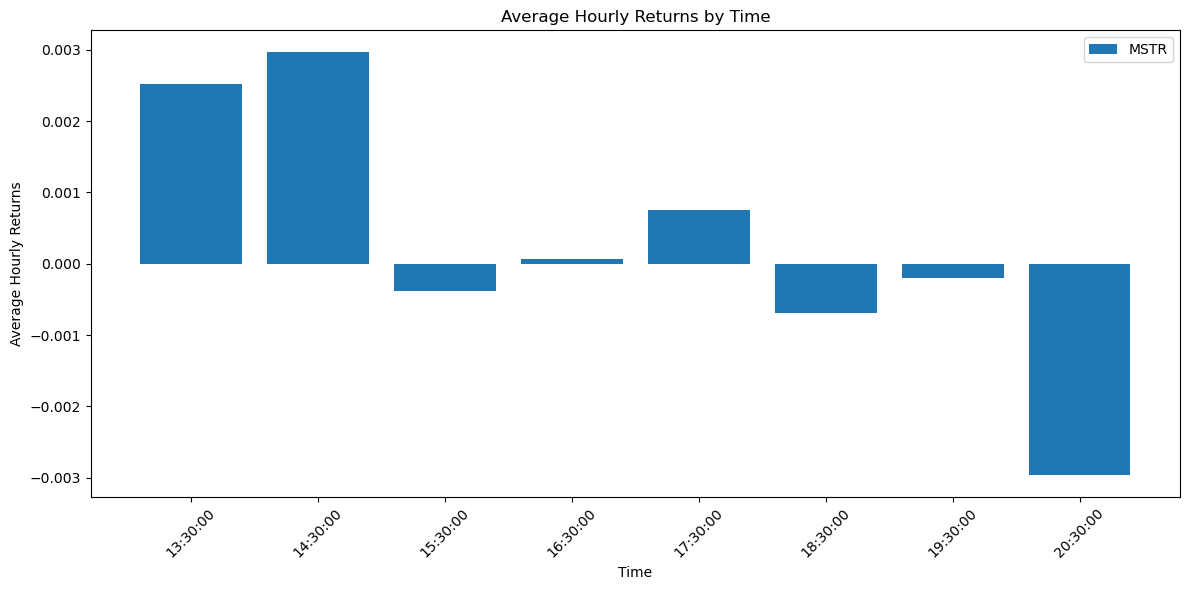

In [31]:
# plot avg_daily_returns by Time, using matplotlib
plt.figure(figsize=(12, 6))

# Convert time to string for plotting
time_strings = avg_daily_returns['Time'].astype(str)

# plt.bar(time_strings, avg_daily_returns['MSTU_pct_change'], label='MSTU')
plt.bar(time_strings, avg_daily_returns['MSTR_pct_change'], label='MSTR')
plt.xlabel('Time')
plt.ylabel('Average Hourly Returns')
plt.title('Average Hourly Returns by Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

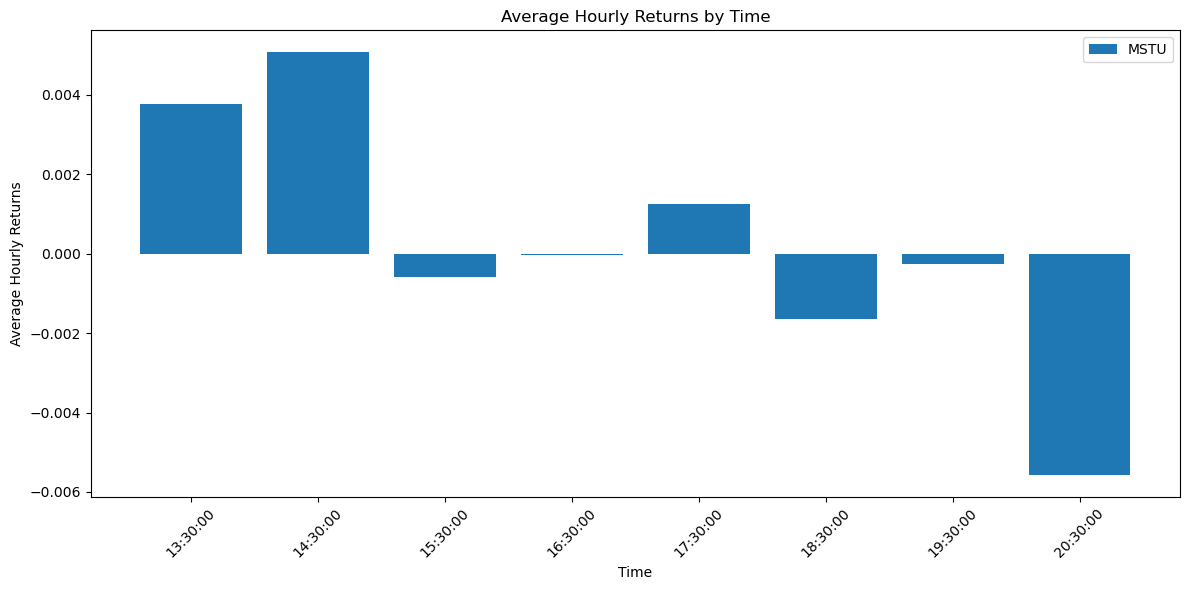

In [32]:
# plot avg_daily_returns by Time, using matplotlib
plt.figure(figsize=(12, 6))

# Convert time to string for plotting
time_strings = avg_daily_returns['Time'].astype(str)

plt.bar(time_strings, avg_daily_returns['MSTU_pct_change'], label='MSTU')
# plt.bar(time_strings, avg_daily_returns['MSTR_pct_change'], label='MSTR')
plt.xlabel('Time')
plt.ylabel('Average Hourly Returns')
plt.title('Average Hourly Returns by Time')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

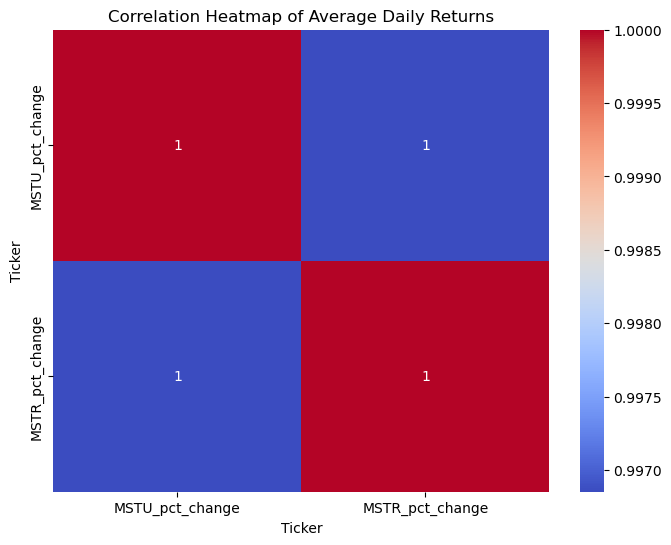

In [33]:
# correlation heatmap of avg_daily_returns
plt.figure(figsize=(8, 6))
sns.heatmap(avg_daily_returns[['MSTU_pct_change', 'MSTR_pct_change']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Average Daily Returns')
plt.show()